# Regex 2

In [1]:
#import statements
import re
from subprocess import check_output
import pandas as pd

In [2]:
# Example strings
# from DS100 book...
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯"])
print(s1)

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)
"""
print(s2)

s3 = "In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!"
print(s3)

s4 = """In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯
1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)

In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!
In CS 320,  there are 14 quizzes,    7 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!


In [3]:
print(s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Regex is case sensitive

### Character classes

- Character classes can be mentioned within `[...]`
- `^` means `NOT` of a character class
- `-` enables us to mention range of characters, for example `[A-Z]`
- `|` enables us to perform `OR`

### Metacharacters

- predefined character classes
    - `\d` => digits
    - `\s` => whitespace (space, tab, newline)
    - `\w` => "word" characters (digits, letters, underscores, etc) --- helpful for variable name matches and whole word matches (as it doesn't match whitespace --- `\s`)
    - `.` => wildcard: anything except newline
- capitalized version of character classes mean `NOT`, for example `\D` => everything except digits

### REPETITION

- `<character>{<num matches>}` - for example: `w{3}`
- matches cannot overlap

### Variable length repitition operators

- `*` => 0 or more (greedy: match as many characters as possible)
- `+` => 1 or more (greedy: match as many characters as possible)
- `?` => 0 or 1
- `*?` => 0 or more (non-greedy: match as few characters as possible)
- `+?` => 1 or more (non-greedy: match as few characters as possible)

#### Find everything inside of parentheses.

In [4]:
# this doesn't work
# it captures everything because () have special meaning (coming up)
reg(r"(.*)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [5]:
# How can we change this to not use special meaning of ()?
# * is greedy: match as many characters as possible
reg(r"\(.*\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [6]:
# non-greedy: stop at the first possible spot instead of the last possible spot
reg(r"\(.*?\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Anchor characters
- `^` => start of string
    - `^` is overloaded --- what was the other usage?
- `$` => end of string

#### Find everything in the first sentence.

In [7]:
# doesn't work because remember regex finds all possible matches
# so it matches every single sentence 
# (even though we are doing non-greedy match)
reg(r".*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


In [8]:
reg(r"^.*?\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find everything in the first two sentences.

In [9]:
reg(r"^(.*?\.){2}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


#### Find last "word" in the sentence.

In [10]:
reg(r"\S+$", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯


### Case study: find all phone numbers.

In [11]:
print(s2)
# The country code (1) in the front is optional
# The area code (608) is also optional
# Doesn't make sense to match country code without area code though!

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [12]:
# Full US phone numbers
reg(r"\d-\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [13]:
# The country code (1) in the front is optional
reg(r"(\d-)?\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [14]:
# The area code (608) is also optional
# Doesn't make sense to have country code without area code though!
reg(r"(\d-)?(\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



In [15]:
# This is good enough for 320 quizzes/tests
# But clearly, the last match is not correct
reg(r"((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



Regex documentation link: https://docs.python.org/3/library/re.html.

In [16]:
# BONUS: negative lookbehind (I won't test this)
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)



There is also a negative lookahead. For example, how to avoid matching "1-608-123-456" in "1-608-123-4569999". You can explore this if you are interested.

In [17]:
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", "608-123-4569999")

608-123-4569999


### Testing your regex
- you could use `reg(...)` function
- another useful resource: https://regex101.com/

### `re` module
- `re.findall(<PATTERN>, <SEARCH STRING>)`: regular expression matches
    - returns a list of strings 
- `re.sub(<PATTERN>, <REPLACEMENT>, <SEARCH STRING>)`: regular expression match + substitution
    - returns a new string with the substitutions (remember strings are immutable)

In [18]:
msg = "In CS 320,\tthere are 40 lectures, 10 quizzes, 3 exams,\t7 projects, and 1000 things to learn. CS 320 is awesome!"
print(msg)

In CS 320,	there are 40 lectures, 10 quizzes, 3 exams,	7 projects, and 1000 things to learn. CS 320 is awesome!


#### Find all digits.

In [19]:
re.findall(r"\d+", msg)

['320', '40', '10', '3', '7', '1000', '320']

### Groups
- we can capture matches using `()` => this is the special meaning of `()`
- returns a list of tuples, where length of the tuple will be number of groups

#### Find all digits and the word that comes after that.

In [20]:
matches = re.findall(r"(\d+) (\w+)", msg)
matches

[('40', 'lectures'),
 ('10', 'quizzes'),
 ('3', 'exams'),
 ('7', 'projects'),
 ('1000', 'things'),
 ('320', 'is')]

#### Goal: make a dict (course component => count, like "projects" => 7)

In [21]:
course_dict = {}
for count, component in matches:
    course_dict[component] = int(count)
course_dict

{'lectures': 40,
 'quizzes': 10,
 'exams': 3,
 'projects': 7,
 'things': 1000,
 'is': 320}

### Unlike matches, groups can overlap

#### Find and group all digits and the word that comes after that.

In [22]:
re.findall(r"((\d+) (\w+))", msg)

[('40 lectures', '40', 'lectures'),
 ('10 quizzes', '10', 'quizzes'),
 ('3 exams', '3', 'exams'),
 ('7 projects', '7', 'projects'),
 ('1000 things', '1000', 'things'),
 ('320 is', '320', 'is')]

#### Substitute all digits with "###".

In [23]:
re.sub(r"\d+", "###", msg)

'In CS ###,\tthere are ### lectures, ### quizzes, ### exams,\t### projects, and ### things to learn. CS ### is awesome!'

#### Goal: normalize whitespace (everything will be a single space)

In [24]:
print(msg)

In CS 320,	there are 40 lectures, 10 quizzes, 3 exams,	7 projects, and 1000 things to learn. CS 320 is awesome!


In [25]:
re.sub(r"\s+", " ", msg)

'In CS 320, there are 40 lectures, 10 quizzes, 3 exams, 7 projects, and 1000 things to learn. CS 320 is awesome!'

### How to use groups is substitution?
- `\g<N>` gives you the result of the N'th grouping.

#### Substitute all course component counts with HTML bold tags.

In [26]:
print(re.sub(r"(\d+)", "<b>\g<1></b>", msg))

In CS <b>320</b>,	there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams,	<b>7</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!


In CS <b>320</b>, there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams, <b>7</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!

### Git log example

#### Run `git log` as a shell command

In [27]:
!git log

commit 5e40bf034e38a37fbc46184dbc4b894fb872e828 (HEAD -> main, origin/main)
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 10:43:42 2023 -0500

    Minor change to document about word match

commit 9d668e00bb8e8f6875423092f433c97351fb43a6
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 08:57:30 2023 -0500

    Lec 22 notebooks

commit 0a530a7fe608967e029371e183d3a9e68d22d48c
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Tue Mar 21 16:13:50 2023 -0500

    Lec 22 files

commit acadc06ac33ccce848344e36cb25838e366d2d07
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Tue Mar 21 14:31:16 2023 -0500

    Initial version

commit e377705d83556cb74075914ce81c69c11128005b
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Sun Mar 19 22:21:05 2023 -0500

    Lec 21 code

commit d0a49dc67a467b34f1d64bee6c8e20a23e644363
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Sun Mar 19 22:1

In [28]:
git_log_output = str(check_output(["git", "log"]), encoding="utf-8")
print(git_log_output[:500])

commit 5e40bf034e38a37fbc46184dbc4b894fb872e828
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 10:43:42 2023 -0500

    Minor change to document about word match

commit 9d668e00bb8e8f6875423092f433c97351fb43a6
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 08:57:30 2023 -0500

    Lec 22 notebooks

commit 0a530a7fe608967e029371e183d3a9e68d22d48c
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Tue Mar 21 16:13:50 2023 -0500



#### GOAL: find all the commit numbers

In [29]:
commits = re.findall(r"[0-9a-f]{40}", git_log_output)
# recent 10 commit numbers
commits[:10]

['5e40bf034e38a37fbc46184dbc4b894fb872e828',
 '9d668e00bb8e8f6875423092f433c97351fb43a6',
 '0a530a7fe608967e029371e183d3a9e68d22d48c',
 'acadc06ac33ccce848344e36cb25838e366d2d07',
 'e377705d83556cb74075914ce81c69c11128005b',
 'd0a49dc67a467b34f1d64bee6c8e20a23e644363',
 'b5f256305b4a633bf184711bf64d9da83ac2880d',
 '76b43a74907577a7d3e5d04483ea5de67c572483',
 'ef2c32f2ed1f4edbf75004bc248f1456de5981a8',
 'f20db40329c0717c1eae8bb9eb093775ba174964']

#### What days of the week does Meena push things into this repo?

In [30]:
print(git_log_output[:500])

commit 5e40bf034e38a37fbc46184dbc4b894fb872e828
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 10:43:42 2023 -0500

    Minor change to document about word match

commit 9d668e00bb8e8f6875423092f433c97351fb43a6
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Fri Mar 24 08:57:30 2023 -0500

    Lec 22 notebooks

commit 0a530a7fe608967e029371e183d3a9e68d22d48c
Author: Meenakshi Syamkumar <meenakshi.psgit@gmail.com>
Date:   Tue Mar 21 16:13:50 2023 -0500



In [31]:
days = re.findall(r"Date:\s+(\w+)", git_log_output)
days

['Fri',
 'Fri',
 'Tue',
 'Tue',
 'Sun',
 'Sun',
 'Fri',
 'Fri',
 'Fri',
 'Thu',
 'Wed',
 'Sun',
 'Sun',
 'Sun',
 'Wed',
 'Tue',
 'Mon',
 'Mon',
 'Mon',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Fri',
 'Fri',
 'Wed',
 'Mon',
 'Mon',
 'Mon',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Wed',
 'Tue',
 'Tue',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Mon',
 'Mon']

#### Count unique days

In [32]:
day_counts = pd.Series(days).value_counts()
day_counts

Mon    19
Fri    15
Wed    14
Tue     5
Sun     5
Thu     1
dtype: int64

#### Sort by day of the week

In [33]:
sorted_day_counts = day_counts.loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sun"]]
sorted_day_counts

Mon    19
Tue     5
Wed    14
Thu     1
Fri    15
Sun     5
dtype: int64

#### Create a bar plot

Text(0.5, 0, 'Days of the week')

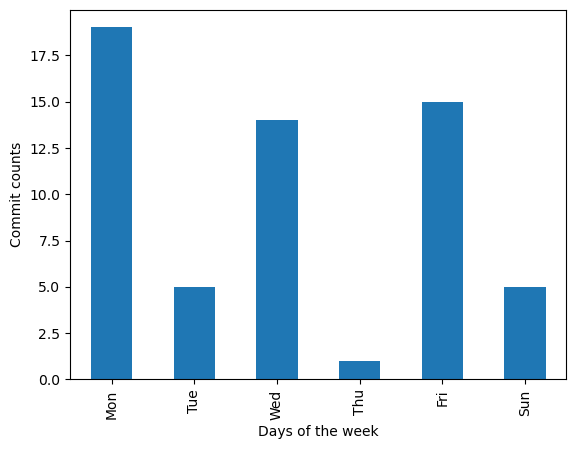

In [34]:
ax = sorted_day_counts.plot.bar()
ax.set_ylabel("Commit counts")
ax.set_xlabel("Days of the week")

#### Find all commit autho names.

In [35]:
authors = re.findall(r"Author:\s+(.+?)\s*<", git_log_output)
authors[0]

'Meenakshi Syamkumar'

#### `git log` from projects repo

In [36]:
git_log_output = str(check_output(["git", "log"], cwd="../../cs320-s23-projects"), encoding="utf-8")
print(git_log_output[:1000])

commit 3c41183455f750f09a9f4160ff76cef21eddba70
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Sun Mar 26 07:18:59 2023 +0000

    lab10

commit fdbad60d32e8c011b784e906fb74d3363ba68124
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Sun Mar 19 20:45:59 2023 +0000

    rm 8

commit 41c7c5fe77ee972e18b6f55eecb971429cf1ed1a
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Sun Mar 19 20:45:15 2023 +0000

    8->9

commit 4548a518bc024f4e2c8cf7f5a0dadc106b794654
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Sun Mar 19 20:42:15 2023 +0000

    lab8

commit a6544fa07d9eb4df75fcce6abf05fc49caa2bf5b
Merge: 36998d4 7a629f1
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Fri Mar 10 20:54:00 2023 +0000

    Merge branch 'main' of github.com:msyamkumar/cs320-s23-projects

commit 36998d42eb936128f8a12ce5e521ce70ff777f98
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Fri Mar 10 20:53:55 2023 +0000

    p4

commit 7a629f186e1f17d5035420930684cbf77a9c73e2
Author: msyamkumar <meena

In [37]:
re.findall(r".*[pP][1-7].*", git_log_output)

['    p4',
 '    Change link to P1 grading',
 '    Change link to P1 grading',
 '    Changing the link to point to the P1 grading guidelines instead of the P1 README.',
 '    p3 and lab6',
 '    p2 grading guidelines',
 '    p1 rubric',
 '    p2',
 '    p1 q14',
 '    p1 release']

### Emails example

In [38]:
s = """
Meena [Instructor] - ms (AT) cs.wisc.edu
Yiyin [Head TA] - yshen82 (AT) wisc.edu
Ivan [TA] - ivanjaenm (AT) cs.wisc.edu
Mahitha [TA] - pillodi (AT) wisc.edu
Jiaqi [Peer Mentor]: jxia53 (AT) wisc.edu
Garrison [Peer Mentor]: gwaugh (AT) wisc.edu
"""
print(s)


Meena [Instructor] - ms (AT) cs.wisc.edu
Yiyin [Head TA] - yshen82 (AT) wisc.edu
Ivan [TA] - ivanjaenm (AT) cs.wisc.edu
Mahitha [TA] - pillodi (AT) wisc.edu
Jiaqi [Peer Mentor]: jxia53 (AT) wisc.edu
Garrison [Peer Mentor]: gwaugh (AT) wisc.edu



In [39]:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]]?)"
domain = r"\w+\.(\w+\.)?(edu|com|org|net|io|gov)"

full_regex = f"(({name})\s*({at})\s*({domain}))"

re.findall(full_regex, s)

[('ms (AT) cs.wisc.edu', 'ms', '(AT)', '(AT)', 'cs.wisc.edu', 'wisc.', 'edu'),
 ('yshen82 (AT) wisc.edu', 'yshen82', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('ivanjaenm (AT) cs.wisc.edu',
  'ivanjaenm',
  '(AT)',
  '(AT)',
  'cs.wisc.edu',
  'wisc.',
  'edu'),
 ('pillodi (AT) wisc.edu', 'pillodi', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('jxia53 (AT) wisc.edu', 'jxia53', '(AT)', '(AT)', 'wisc.edu', '', 'edu'),
 ('gwaugh (AT) wisc.edu', 'gwaugh', '(AT)', '(AT)', 'wisc.edu', '', 'edu')]

In [40]:
print("REGEX:", full_regex)
for match in re.findall(full_regex, s):
    print(match[1] + "@" + match[4])

REGEX: ((\w+)\s*(@|([\(\[]?[Aa][Tt][\)\]]?))\s*(\w+\.(\w+\.)?(edu|com|org|net|io|gov)))
ms@cs.wisc.edu
yshen82@wisc.edu
ivanjaenm@cs.wisc.edu
pillodi@wisc.edu
jxia53@wisc.edu
gwaugh@wisc.edu


### Self-practice

Q1: Which regex will NOT match "123"
1. r"\d\d\d"
2. r"\d{3}"
3. r"\D\D\D"
4. r"..."

Q2: What will r"^A" match?
1. "A"
2. "^A"
3. "BA"
4. "B"
5. "BB"

Q3: Which one can match "HH"?
1. r"HA+H"
2. r"HA+?H"
3. r"H(A+)?H"

Q4: Which string(s) will match r"^(ha)*$"
1. ""
2. "hahah"
3. "that"
4. "HAHA"

Q5: What is the type of the following?re.findall(r"(\d) (\w+)", some_str)[0]
1. list
2. tuple
3. string

Q6: What will it do?
```python
re.sub(r"(\d{3})-(\d{3}-\d{4})",
       r"(\g<1>) \g<2>",
       "608-123-4567")
```

I will post answers to self-practice questions as part of the next lecture notebook. Meanwhile, try to solve it using pen & paper. Then try to verify your answer using code.